## MLP for Regression

In [42]:
#import packages
from numpy import sqrt
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot 
from tensorflow.keras.utils import plot_model
import pydot 
import warnings
warnings.filterwarnings("ignore")

We will use the Boston housing regression dataset to demonstrate an MLP for regression predictive modeling.

This problem involves predicting house value based on properties of the house and neighborhood.

In [8]:
# load the dataset
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = read_csv(path, header=None)

In [9]:
#first five row 
df.head() 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [10]:
# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

(339, 13) (167, 13) (339,) (167,)


In [30]:
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

In [38]:
# summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [31]:
# compile the model
model.compile(optimizer='adam', loss='mse')


In [32]:
# fit the model
history = model.fit(X_train, y_train, epochs=150, batch_size=32,validation_split=0.2, verbose=0)


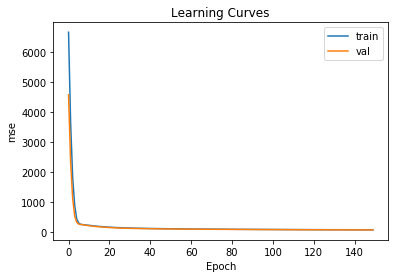

In [33]:
# plot learning curves
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('mse')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

In [34]:
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))


MSE: 69.641, RMSE: 8.345


In [35]:
# make a prediction
row = [0.00632,18.00,2.310,0,6.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,44.98]
result = model.predict([row])
print('Predicted: %.3f' % result)

Predicted: 26.843
